Imagine $Y$ is a random variable with an underlying 
This notebook shows, through both mathematical derivations and simulations, why 
-   Under squared error loss, mean is optimal.
-   Under absolute error loss, median is optimal
-   Under absolute percentage loss, median of an auxiliary variable whose density is proprtional to 

In [1]:
from scipy.stats import gamma, uniform
import numpy as np
import matplotlib.pyplot as plt

import utilityFuncs as uf

## Under Squared Error Loss, Mean is Optimal.

In the previous video (https://www.youtube.com/watch?v=ep3sQjXjPEg&ab_channel=MLBoost), we saw that when expert submits the mean as her forecasts, she wins only under the MSE loss. This is because mean or expecte value is optimal under the squared error loss as shown below.

Imagine a general loss function $L$ between random variable $Y$ and a point estimate of it $y$ as $L(Y, y)$. It represents the loss that one will incur by selecting one particular value, $y$, from the random variable $Y$ that has a range of plausible values.

The objective is to find the specific $y$ that minimizes the expected value of L. That specific value is denoted by $\hat{y}$. This optimization problem can be expressed formally as 


$$\hat{y} = \underset{\tilde{y}}{\argmin}\ \mathbb{E}_{Y\!\sim p(y)}[L(Y,\tilde{y})] $$

With $L(Y, \tilde{y}) = (Y - \tilde{y})^2$, the above equation becomes 


$$
\begin{aligned}
\hat{y} &= \underset{\tilde{y}}{\argmin}\ \mathbb{E}_{Y\!\sim p(y)}[(Y - \tilde{y})^2]\\
&= \underset{\tilde{y}}{\argmin}\ \mathbb{E}_{Y\!\sim p(y)}[Y^2 + \tilde{y}^2 - 2Y\tilde{y}] &&\text{take } y &\text{out of expectation because it is not a random variable}\\
&= \underset{\tilde{y}}{\argmin}\ \{\tilde{y}^2 + {\mathbb{E}_{Y\!\sim p(y)}[Y^2]} - {2\tilde{y}\mathbb{E}_{Y\!\sim p(y)}[Y]}\} &&\hat{y} &\text{is the value of y that makes the derivative of the term inside argmin 0} \\


&=\left\{ \tilde{y} \in \mathbb{R} \mid \frac{\partial}{\partial \tilde{y}}\{\tilde{y}^2 + {\mathbb{E}_{Y\!\sim p(y)}[Y^2]} - {2\tilde{y}\mathbb{E}_{Y\!\sim p(y)}[Y]}\}= 0 \right\}\\

&=\mathbb{E}_{Y\sim p(y)}[Y] \\

\end{aligned}
$$


Showing that, under the SE loss, the optimal value for $y$, that is $\hat{y}$, is the expected value of the distribution of $Y$,   $p(y)$.

## Under Absolute Error Loss, Median is Optimal. 

With $L(Y, \tilde{y}) = |Y - \tilde{y}|$, 


$$
\begin{aligned}
\hat{y} &= \underset{\tilde{y}}{\argmin}\ \mathbb{E}_{Y\!\sim p(y|t)}[|Y - \tilde{y}|]\\
&= \underset{\tilde{y}}{\argmin}\ \left\{\int^{+\infty}_{-\infty} |y - \tilde{y}| p(y|t) \, dy\right\} &&\text{split the integral}\\

&= \underset{\tilde{y}}{\argmin}\ \left\{\int^{\tilde{y}}_{-\infty} (\tilde{y} - y) p(y|t) \, dy + \int^{\infty}_{\tilde{y}} (y - \tilde{y}) p(y|t) \, dy\right\} &&\text{take y hat out of the integral}\\

&= \underset{\tilde{y}}{\argmin}\ \left\{\tilde{y}\left[\int^{\tilde{y}}_{-\infty} p(y|t) \, dy - \int^{\infty}_{\tilde{y}} p(y|t) \, dy\right] - \int^{\tilde{y}}_{-\infty} yp(y|t) \, dy + \int^{\infty}_{\tilde{y}} yp(y|t) \, dy\right\} &&\text{set the derivative of term inside argmin to 0}\\

&=\left\{ \tilde{y} \in \mathbb{R} \mid \int^{\tilde{y}}_{-\infty} p(y|t) \, dy = \int^{\infty}_{\tilde{y}} p(y|t) \, dy \right\} &&\text{from definition of median}\\

&=\mathbb{M}_{Y\sim p(y|t)}[Y] &&\text{where } \mathbb{M} \text{ represents the median functional}\\

\end{aligned}
$$

The second line from the bottom follows from the fact that taking the derivative of the first two terms inside the argmin with respect to $\tilde{y}$ gives $\int^{\tilde{y}}_{-\infty} p(y|t) \, dy - \int^{\infty}_{\tilde{y}} p(y|t) \, dy + \tilde{y}p(\tilde{y}|t) + \tilde{y}p(\tilde{y}|t)$ and taking the derivative of the last two terms inside the argmin gives $-\tilde{y}p(\tilde{y}|t)$ and $-\tilde{y}p(\tilde{y}|t)$

## Under Absolute Percentage Error Loss, median of an auxiliary variable with density ~ $f(y)/y$ is Optimal. 

With $L(Y, \tilde{y}) = \lvert\frac{ Y - \tilde{y}}{Y}\rvert$, 

$$
\begin{aligned}
\hat{y} &= \underset{\tilde{y}}{\argmin}\ \mathbb{E}_{Y\!\sim p(y|t)}[\lvert\frac{ Y - \tilde{y}}{Y}\rvert]\\


&= \underset{\tilde{y}}{\argmin}\ \left\{\int^{+\infty}_{-\infty} \lvert\frac{ Y - \tilde{y}}{Y}\rvert p(y|t) \, dy\right\} &&\text{split the integral}\\

&= \underset{\tilde{y}}{\argmin}\ \left\{\int^{\tilde{y}}_{-\infty} (\frac{\tilde{y} - y}{y}) p(y|t) \, dy + \int^{\infty}_{\tilde{y}} (\frac{y - \tilde{y}}{y}) p(y|t) \, dy\right\} &&\text{,,,}\\

&= \underset{\tilde{y}}{\argmin}\ \left\{\int^{\tilde{y}}_{-\infty} \frac{\tilde{y}}{y}p(y|t) \, dy - \int^{\tilde{y}}_{-\infty} p(y|t) \, dy + \int^{\infty}_{\tilde{y}} p(y|t) \, dy - \int^{\infty}_{\tilde{y}} \frac{\tilde{y}}{y} p(y|t) \, dy\right\} &&\text{take y hat out}\\


&= \underset{\tilde{y}}{\argmin}\ \left\{\tilde{y}\left\{\int^{\tilde{y}}_{-\infty} \frac{p(y|t)}{y} \, dy- \int^{\infty}_{\tilde{y}} \frac{p(y|t)}{y}  \, dy\right\}  - \int^{\tilde{y}}_{-\infty} p(y|t) \, dy + \int^{\infty}_{\tilde{y}} p(y|t) \, dy  \right\} &&\text{set the derivative of term inside argmin to 0}\\

&=\left\{ \tilde{y} \in \mathbb{R} \mid \int^{\tilde{y}}_{-\infty} \frac{p(y|t)}{y} \, dy = \int^{\infty}_{\tilde{y}} \frac{p(y|t)}{y} \, dy \right\} &&\text{from definition of median}\\

&=\mathbb{M}_{Y_2\sim \frac{p(y|t)}{y}}[Y_2] &&\text{where } \mathbb{M} \text{ represents the median functional}\\

\end{aligned}
$$

The second line from the bottom follows from the fact that taking the derivative of the first two terms inside argmax with respect to $\hat{y}$ gives $\int^{\tilde{y}}_{-\infty} \frac{p(y|t)}{y} \, dy - \int^{\infty}_{\tilde{y}} \frac{p(y|t)}{y}  \, dy + 2p(\tilde{y}|t)$ and taking the derivative of last two terms gives $- 2p(\tilde{y}|t)$

This indicates that under MAPE, assuming that support of $p(y|t)$ is the positive half-axis, the otimal point is the median of an auxiliary random variable whose density is proportional to $\frac{p(y|t)}{y}$. Note that such median, and therefore such optimal point, will not exist if $p(y|t)$ does not have a finite moment of order -1. To see examples of such distributions refer to, for example, https://ecommons.cornell.edu/bitstream/handle/1813/32874/BU-771-M.pdf;sequence=1.

## Verify above Derivations using Simulations
The optimality of mean and median under SE and AE losses is well-known. The optimality under APE is less known so lets verify the above result using simulations. We first need a density which has finite moement of order -1. 

In [2]:
y_tildas = np.linspace(0, 3, 1000).reshape(-1, 1)

Y_dist = gamma(2)
n = 10000
Y = Y_dist.rvs(n) 


# Calculate error metrics
MSE_values = np.mean((Y - y_tildas) ** 2, axis=1)
MAE_values = np.mean(np.abs(Y - y_tildas), axis=1)
MAPE_values = np.mean(np.abs((Y - y_tildas) / Y), axis=1)

# Perform importance sampling on distribution f(y)/y to get samples for the auxiliary variable
Y_aux, weights = uf.importance_sampling(lambda x: Y_dist.pdf(x)/x, uniform(loc=0, scale=10), n)

Text(0.5, 0, '$\\tilde{y}$')

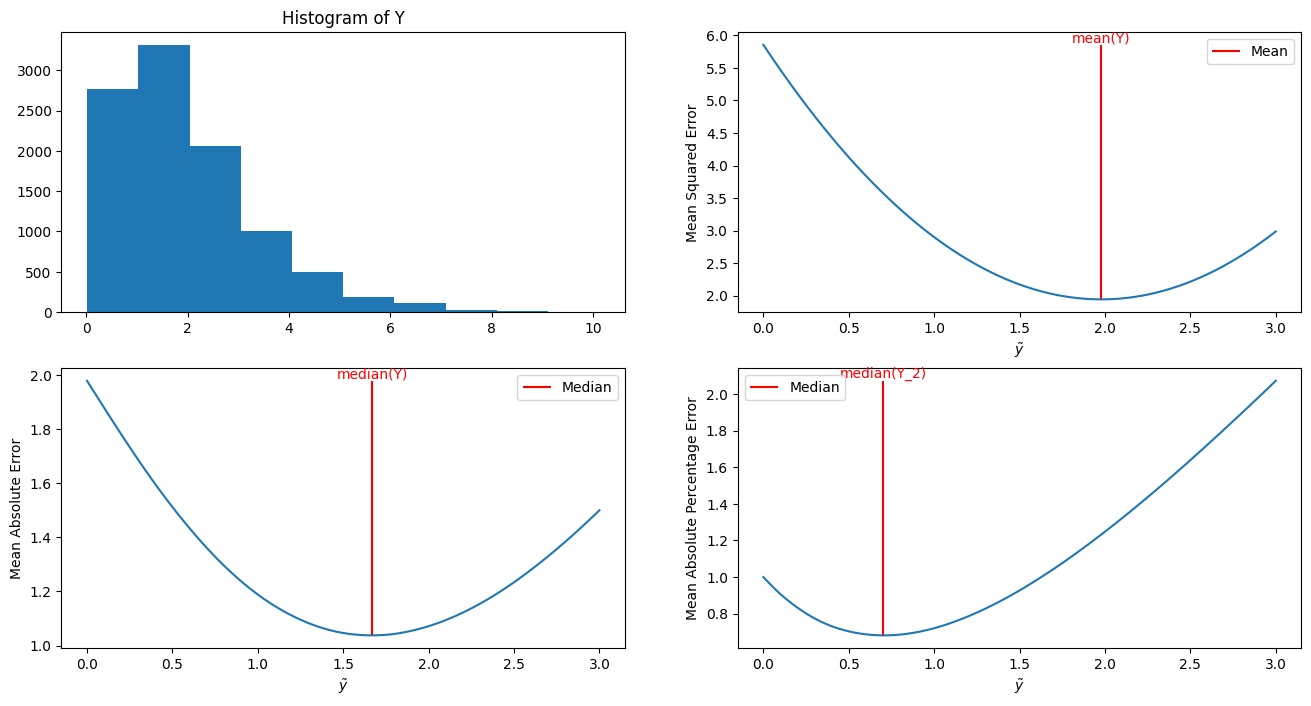

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes[0, 0].hist(Y)
axes[0, 0].set_title("Histogram of Y")

axes[0, 1].plot(y_tildas, MSE_values)
axes[0, 1].vlines(np.mean(Y), ymin=min(MSE_values), ymax=max(MSE_values), colors="r", label="Mean")
axes[0, 1].set_ylabel("Mean Squared Error")
axes[0, 1].set_xlabel(r"$\tilde{y}$")
axes[0, 1].text(np.mean(Y), max(MSE_values), f'mean(Y)', ha='center', va='bottom', color='r', fontsize=10)
axes[0, 1].legend()

axes[1, 0].plot(y_tildas, MAE_values)
axes[1, 0].vlines(np.median(Y), ymin=min(MAE_values), ymax=max(MAE_values), colors="r", label="Median")
axes[1, 0].set_ylabel("Mean Absolute Error")
axes[1, 0].set_xlabel(r"$\tilde{y}$")
axes[1, 0].text(np.median(Y), max(MAE_values), f'median(Y)', ha='center', va='bottom', color='r', fontsize=10)
axes[1, 0].legend()

axes[1, 1].plot(y_tildas, MAPE_values)
axes[1, 1].vlines(np.median(Y_aux), ymin=min(MAPE_values), ymax=max(MAPE_values), colors="r", label="Median")
axes[1, 1].set_ylabel("Mean Absolute Percentage Error")
axes[1, 1].set_xlabel(r"$\tilde{y}$")
axes[1, 1].legend()

# Add labels to the vertical lines
axes[1, 1].text(np.median(Y_aux), max(MAPE_values), f'median(Y_2)', ha='center', va='bottom', color='r', fontsize=10)
axes[1, 1].set_xlabel(r"$\tilde{y}$")